#Physics Informed Deep Learning: 

given the spring mass system with springs having constants $K_1,\, K_2,\, K_3, \, K_4\,$ and the blocks having masses $M_1,\, M_2,\, M_3$ and the differential equations for the system.

$$M_3 \ddot{x_3} = -K_3(x_3-x_2) - K_4x_3$$
$$M_1 \ddot{x_1} = -K_1x_1 + K_2(x_2-x_1)$$
$$M_2 \ddot{x_2} = -K_2(x_2-x_1) + K_3(x_3-x_2)$$


we have to estimate the parameters of the differential equation as they are unknown, first we generate the system response from the true params then do
three experiments 1) adding gaussian noise 0% 2) adding gaussian noise 5%
3) adding gaussian noise 10%. 

### Generating training data:

In [240]:
k1, k2, k3, k4 = 2, 1, 1, 2
m1, m2, m3 = 1, 1, 1
Nx = 1000

import numpy as np 
from scipy.integrate import solve_ivp

def rhs(t, v):
  a = k1/m1
  b = k2/m1
  c = k2/m2
  d = k2/m2+k3/m2
  e = k3/m2
  f = k3/m3
  g = k3/m3+k4/m3
  return [v[3], v[4], v[5], -(a+b)*v[0]+b*v[1], c*v[0]-d*v[1]+e*v[2], f*v[1]-g*v[2]]

res = solve_ivp(rhs, (0, 10), [1, 0, 0, 0, 0, 0], t_eval=np.linspace(0, 10, Nx))

In [241]:
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 164
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.560560

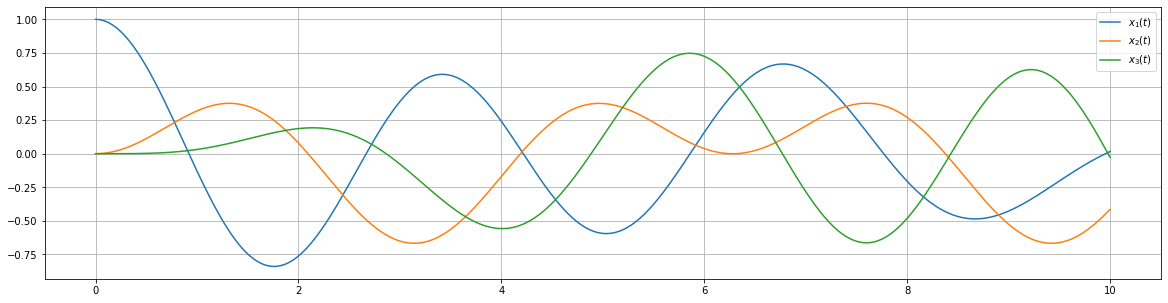

In [242]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(res.t, res.y[0, :], label="$x_1(t)$")
plt.plot(res.t, res.y[1, :], label="$x_2(t)$")
plt.plot(res.t, res.y[2, :], label="$x_3(t)$")

plt.legend()
plt.grid()

In [244]:
# adding noise to the real data: 
res.y = res.y + 0.05 * np.random.randn(6, Nx)

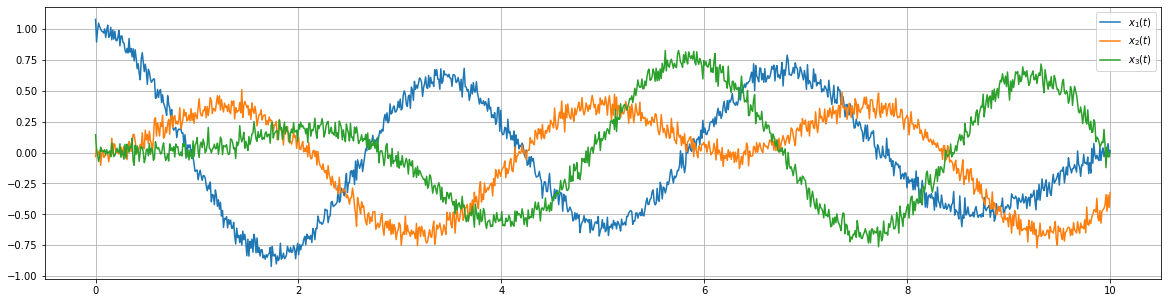

In [245]:
plt.figure(figsize=(20, 5))
plt.plot(res.t, res.y[0, :], label="$x_1(t)$")
plt.plot(res.t, res.y[1, :], label="$x_2(t)$")
plt.plot(res.t, res.y[2, :], label="$x_3(t)$")

plt.legend()
plt.grid()

### Estimating $M_1$ and $K_4$ using PINN: 

we can simply construct the problem as an inverse problem in physics informed deep learning. the loss function will have initial condition loss and residual loss. suppose if we use $N_t$ collocation points then: 

$$J(m_1, k_4) = \frac{1}{N_t}\sum R_t^2 + \text{(initial condition loss)}$$

$$\text{initial condition loss} = (n_{0,0}(0)-1)^2+(n_{0,1}(0))^2+(n_{0,2}(0))^2+(n_{0,3}(0))^2+(n_{0,4}(0))^2+(n_{0,5}(0))^2$$

In [246]:
import torch 
import torch.nn as nn
from torch.autograd import Variable

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [247]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()
    self.hidden_layer1 = nn.Linear(1,100)
    self.hidden_layer2 = nn.Linear(100,100)
    self.hidden_layer3 = nn.Linear(100,100)
    self.hidden_layer4 = nn.Linear(100,100)
    self.hidden_layer5 = nn.Linear(100,100)
    self.hidden_layer6 = nn.Linear(100,100)
    self.hidden_layer7 = nn.Linear(100,100)
    self.hidden_layer8 = nn.Linear(100,100)
    self.hidden_layer9 = nn.Linear(100,100)
    self.hidden_layer10 = nn.Linear(100,100)
    self.hidden_layer11 = nn.Linear(100,100)
    self.hidden_layer12 = nn.Linear(100,100)
    self.hidden_layer13 = nn.Linear(100,100)
    self.hidden_layer14 = nn.Linear(100,100)
    self.hidden_layer15 = nn.Linear(100,100)
    self.hidden_layer16 = nn.Linear(100,100)
    self.hidden_layer17 = nn.Linear(100,100)
    self.hidden_layer18 = nn.Linear(100,100)
    self.hidden_layer19 = nn.Linear(100,100)
    self.hidden_layer20 = nn.Linear(100,100)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()
    self.relu3 = nn.ReLU()
    self.relu4 = nn.ReLU()
    self.relu5 = nn.ReLU()
    self.relu6 = nn.ReLU()
    self.relu7 = nn.ReLU()
    self.relu8 = nn.ReLU()
    self.relu9 = nn.ReLU()
    self.relu10 = nn.ReLU()
    self.relu11 = nn.ReLU()
    self.relu12 = nn.ReLU()
    self.relu13 = nn.ReLU()
    self.relu14 = nn.ReLU()
    self.relu15 = nn.ReLU()
    self.relu16 = nn.ReLU()
    self.relu17 = nn.ReLU()
    self.relu18 = nn.ReLU()
    self.lrelu1 = nn.LeakyReLU(0.5)
    self.lrelu2 = nn.LeakyReLU(0.5)

    self.output_layer = nn.Linear(100,6)


  def forward(self, x):
    inputs = x
    layer1_out = self.hidden_layer1(inputs)
    layer1_out = self.relu1(layer1_out)
    layer2_out = self.hidden_layer2(layer1_out)
    layer2_out = self.relu2(layer2_out)
    layer3_out = self.hidden_layer3(layer2_out)
    layer3_out = self.relu3(layer3_out)
    layer4_out = self.hidden_layer4(layer3_out)
    layer4_out = self.lrelu1(layer4_out)
    layer5_out = self.hidden_layer5(layer4_out)
    layer5_out = self.lrelu2(layer5_out)
    layer6_out = self.hidden_layer6(layer5_out)
    layer6_out = self.relu4(layer6_out)
    layer7_out = self.hidden_layer7(layer6_out)
    layer7_out = self.relu5(layer7_out)
    layer8_out = self.hidden_layer8(layer7_out)
    layer8_out = self.relu6(layer8_out)  
    layer9_out = self.hidden_layer9(layer8_out)
    layer9_out = self.relu7(layer9_out)
    layer10_out = self.hidden_layer10(layer9_out)
    layer10_out = self.relu8(layer10_out)
    layer11_out = self.hidden_layer11(layer10_out)
    layer11_out = self.relu9(layer11_out)
    layer12_out = self.hidden_layer12(layer11_out)
    layer12_out = self.relu10(layer12_out)
    layer13_out = self.hidden_layer13(layer12_out)
    layer13_out = self.relu11(layer13_out)
    layer14_out = self.hidden_layer14(layer13_out)
    layer14_out = self.relu12(layer14_out)
    layer15_out = self.hidden_layer15(layer14_out)
    layer15_out = self.relu13(layer15_out)
    layer16_out = self.hidden_layer16(layer15_out)
    layer16_out = self.relu14(layer16_out)
    layer17_out = self.hidden_layer17(layer16_out)
    layer17_out = self.relu15(layer17_out)
    layer18_out = self.hidden_layer18(layer17_out)
    layer18_out = self.relu16(layer18_out)
    layer19_out = self.hidden_layer19(layer18_out)
    layer19_out = self.relu17(layer19_out)
    layer20_out = self.hidden_layer20(layer19_out)
    layer20_out = self.relu18(layer20_out)

    v = self.output_layer(layer20_out)

    return v

In [248]:
m1 = Variable(torch.tensor(np.array([1.20])), requires_grad=True)
k4 = Variable(torch.tensor(np.array([1.82])), requires_grad=True)
m1 = m1.to(device)
k4 = k4.to(device)

In [249]:
NN = net()
mse = torch.nn.MSELoss()
optimizer=torch.optim.Adam(list(NN.parameters())+[m1, k4])

num_epochs = 10000

t0_numpy = np.zeros((100, 1))
v0_numpy = np.concatenate((np.ones((100, 1)), np.zeros((100, 5))), axis = 1)

tc_numpy = np.linspace(0, 10, Nx).reshape(Nx, 1)
vc_numpy = res.y.T.reshape(Nx, 6)

initial_loss_max = 1e12
m1_best, k4_best = 0, 0

for i in range(num_epochs):
  optimizer.zero_grad()
  pt_t0 = Variable(torch.from_numpy(t0_numpy).float(), requires_grad=False).to(device)
  pt_tc = Variable(torch.from_numpy(tc_numpy).float(), requires_grad=True).to(device)
  pt_v0 = Variable(torch.from_numpy(v0_numpy).float(), requires_grad=False).to(device)
  pt_vc = Variable(torch.from_numpy(vc_numpy).float(), requires_grad=False).to(device)
  pt_rc = Variable(torch.from_numpy(np.zeros((Nx, 1))).float(), requires_grad=False).to(device)

  v0 = NN(pt_t0)
  vc = NN(pt_tc)

  lc, mc, nc, xc, yc, zc = torch.reshape(vc[:, 0], (Nx, 1)).float(), torch.reshape(vc[:, 1], (Nx, 1)).float(), torch.reshape(vc[:, 2], (Nx, 1)).float(), torch.reshape(vc[:, 3], (Nx, 1)).float(), torch.reshape(vc[:, 4], (Nx, 1)).float(), torch.reshape(vc[:, 5], (Nx, 1)).float()
  lc_dot = torch.autograd.grad(lc.sum(), pt_tc, create_graph=True)[0].float()
  mc_dot = torch.autograd.grad(mc.sum(), pt_tc, create_graph=True)[0].float()
  nc_dot = torch.autograd.grad(nc.sum(), pt_tc, create_graph=True)[0].float()
  xc_dot = torch.autograd.grad(xc.sum(), pt_tc, create_graph=True)[0].float()
  yc_dot = torch.autograd.grad(yc.sum(), pt_tc, create_graph=True)[0].float()
  zc_dot = torch.autograd.grad(zc.sum(), pt_tc, create_graph=True)[0].float()
  
  r1 = (lc_dot-lc).float()
  r2 = (mc_dot-mc).float()
  r3 = (nc_dot-nc).float()
  r4 = (xc_dot-((-3/m1)*lc + (1/m1)*nc)).float()
  r5 = (yc_dot-(lc - 2*mc + nc)).float()
  r6 = (zc_dot-(mc - (1+k4)*nc)).float()

  boundary_loss = mse(v0, pt_v0)
  residual_loss = (mse(r1, pt_rc)+mse(r2, pt_rc)+mse(r3, pt_rc)+mse(r4, pt_rc)+mse(r5, pt_rc)+mse(r6, pt_rc))
  collocation_loss = (mse(torch.reshape(vc[:, 0], (Nx, 1)), torch.reshape(pt_vc[:, 0], (Nx, 1)))+ mse(torch.reshape(vc[:, 1], (Nx, 1)), torch.reshape(pt_vc[:, 1], (Nx, 1)))+mse(torch.reshape(vc[:, 2], (Nx, 1)), torch.reshape(pt_vc[:, 2], (Nx, 1)))+mse(torch.reshape(vc[:, 3], (Nx, 1)), torch.reshape(pt_vc[:, 3], (Nx, 1)))+mse(torch.reshape(vc[:, 4], (Nx, 1)), torch.reshape(pt_vc[:, 4], (Nx, 1)))+mse(torch.reshape(vc[:, 5], (Nx, 1)), torch.reshape(pt_vc[:, 5], (Nx, 1))))
  
  loss = boundary_loss + 100*collocation_loss + residual_loss
  loss.sum().backward()
  optimizer.step()

  with torch.no_grad():
    if loss.item()<initial_loss_max:
      torch.save(NN, "NN.pth")
      m1_best = m1.item()
      k4_best = k4.item()
      initial_loss_max = loss.item()

  if(i%10==0):
    print(f"epoch {i} : current loss = {loss.item()}, m1 = {m1.item()}, k4 = {k4.item()}")

epoch 0 : current loss = 201.8297576904297, m1 = 1.2009999999633922, k4 = 1.819000000185574
epoch 10 : current loss = 199.45538330078125, m1 = 1.2094718525958637, k4 = 1.810563675474232
epoch 20 : current loss = 199.44790649414062, m1 = 1.2133586787051596, k4 = 1.806354616753754
epoch 30 : current loss = 199.4168243408203, m1 = 1.2151232886072552, k4 = 1.802442611216849
epoch 40 : current loss = 199.4021453857422, m1 = 1.2167513015753972, k4 = 1.796631182904102
epoch 50 : current loss = 199.3712615966797, m1 = 1.2183556323838418, k4 = 1.79098319110394
epoch 60 : current loss = 196.58419799804688, m1 = 1.2200901232086396, k4 = 1.7846952357952461
epoch 70 : current loss = 180.84011840820312, m1 = 1.224169457162369, k4 = 1.7741167164184566
epoch 80 : current loss = 177.15841674804688, m1 = 1.2356123712440572, k4 = 1.7608243749061732
epoch 90 : current loss = 174.0954132080078, m1 = 1.246710405720904, k4 = 1.7497603748893276
epoch 100 : current loss = 170.75064086914062, m1 = 1.25717737411

KeyboardInterrupt: ignored

In [250]:
NN = torch.load('NN.pth')

In [251]:
mse(v0, pt_v0)

tensor(0.0035, grad_fn=<MseLossBackward0>)

In [252]:
mse(vc, pt_vc)

tensor(0.0099, grad_fn=<MseLossBackward0>)

In [253]:
mse(r1, pt_rc)

tensor(0.9725, grad_fn=<MseLossBackward0>)

In [254]:
lc.sum()

tensor(-17.8840, grad_fn=<SumBackward0>)

In [255]:
lc_dot.shape

torch.Size([1000, 1])

In [256]:
lc.shape

torch.Size([1000, 1])

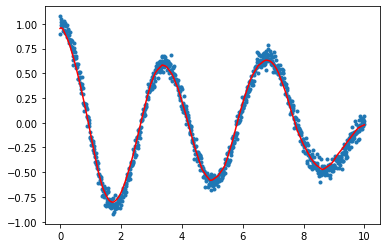

In [260]:
plt.plot(tc_numpy, NN(pt_tc).detach().numpy()[:, 0], 'r')
plt.scatter(tc_numpy, res.y[0, :], marker='.')

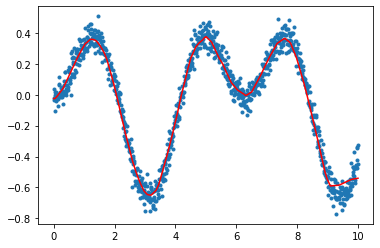

In [261]:
plt.plot(tc_numpy, NN(pt_tc).detach().numpy()[:, 1], 'r')
plt.scatter(tc_numpy, res.y[1, :], marker='.')

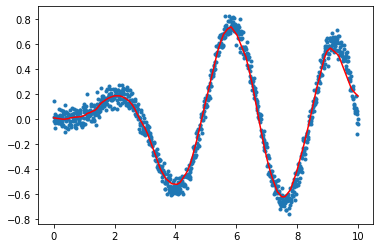

In [262]:
plt.plot(tc_numpy, NN(pt_tc).detach().numpy()[:, 2], 'r')
plt.scatter(tc_numpy, res.y[2, :], marker='.')

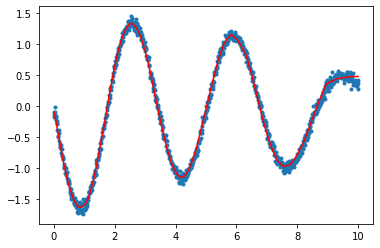

In [263]:
plt.plot(tc_numpy, NN(pt_tc).detach().numpy()[:, 3], 'r')
plt.scatter(tc_numpy, res.y[3, :], marker='.')

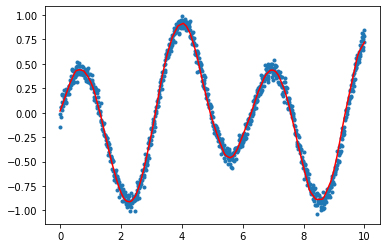

In [264]:
plt.plot(tc_numpy, NN(pt_tc).detach().numpy()[:, 4], 'r')
plt.scatter(tc_numpy, res.y[4, :], marker='.')

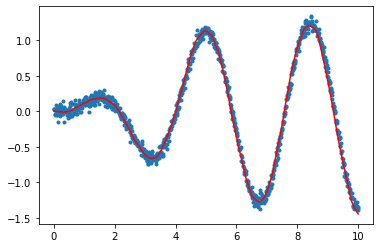

In [265]:
plt.plot(tc_numpy, NN(pt_tc).detach().numpy()[:, 5], 'r')
plt.scatter(tc_numpy, res.y[5, :], marker='.')

In [266]:
m1_best

1.076949418011824

In [267]:
k4_best

2.1382767856870926